# VLBA conversion guide

In [1]:
from importlib.metadata import version
import os

try:
    import xradio

    print("XRADIO version", version("xradio"), "already installed.")
except ImportError as e:
    print(e)
    print("Installing XRADIO")

    os.system("pip install xradio")

    import xradio

    print("xradio version", version("xradio"), " installed.")

XRADIO version 0.0.48 already installed.


## Download dataset

Original VLBA dataset gotten from https://casaguides.nrao.edu/index.php?title=VLBA_Basic_Phase-referencing_Calibration_and_Imaging.

Reduced the data using:

```Python
mstransform(vis='VLBA_TL016B.ms/',outputvis='VLBA_TL016B_split_lsrk.ms',spw='0:0~5,1:0~5',field='0,1', timerange='2022/02/21/06:14:00~2022/02/21/07:55:45.00', regridms=True,outframe='lsrk',datacolumn='all')
```




In [2]:
import toolviper

toolviper.utils.data.download(file="VLBA_TL016B_split.ms")

[2025-04-02 15:03:13,313]  WARNING    viperlog:  File exists: /Users/jsteeb/miniforge3/envs/zinc/lib/python3.12/site-packages/toolviper/utils/data/.dropbox 
[2025-04-02 15:03:13,313]     INFO    viperlog:  Updating file metadata information ...  
 

 Download List         
 ────────────────────── 
  VLBA_TL016B_split.ms

[2025-04-02 15:03:13,928]     INFO    viperlog:  File exists: VLBA_TL016B_split.ms 


## Convert to Processing Set

In [3]:
from xradio.measurement_set import convert_msv2_to_processing_set

ms_file = "VLBA_TL016B_split.ms"

main_chunksize = {"frequency": 1, "time": 20}  # baseline, polarization
outfile = "VLBA_TL016B_split_lsrk.ps.zarr"
convert_msv2_to_processing_set(
    in_file=ms_file,
    out_file=outfile,
    parallel_mode="none",
    overwrite=True,
    main_chunksize=main_chunksize,
)

Output file:  VLBA_TL016B_split_lsrk.ps.zarr
[2025-04-02 15:03:15,406]     INFO    viperlog:  Partition scheme that will be used: ['DATA_DESC_ID', 'OBSERVATION_ID', 'FIELD_ID'] 
[2025-04-02 15:03:15,414]     INFO    viperlog:  Number of partitions: 4 
[2025-04-02 15:03:15,415]     INFO    viperlog:  OBSERVATION_ID [0], DDI [0], STATE [-1], FIELD [0], SCAN [0] 
[2025-04-02 15:03:15,668]  WARNING    viperlog:  Source_id is -1. No source information will be included in the field_and_source_xds. 
[2025-04-02 15:03:15,868]     INFO    viperlog:  OBSERVATION_ID [0], DDI [0], STATE [-1], FIELD [1], SCAN [0] 
[2025-04-02 15:03:16,103]  WARNING    viperlog:  Source_id is -1. No source information will be included in the field_and_source_xds. 
[2025-04-02 15:03:16,348]     INFO    viperlog:  OBSERVATION_ID [0], DDI [1], STATE [-1], FIELD [0], SCAN [0] 
[2025-04-02 15:03:16,548]  WARNING    viperlog:  Source_id is -1. No source information will be included in the field_and_source_xds. 
[2025-04-0

## Processing Set

In [4]:
from xradio.measurement_set import open_processing_set

ps_xdt = open_processing_set(ps_store=outfile)
ps_xdt.xr_ps.summary()

,name,intents,shape,polarization,scan_name,spw_name,field_name,source_name,line_name,field_coords,start_frequency,end_frequency
0,VLBA_TL016B_split_0,[obs_0],"(200, 55, 6, 2)","[RR, LL]",[0],spw_0,[4C39.25_0],[Unknown],[],"[fk5, 9h27m03.01s, 39d02m20.85s]",5.004000e+09,5.006500e+09
1,VLBA_TL016B_split_1,[obs_0],"(540, 55, 6, 2)","[RR, LL]",[0],spw_0,[J1154+6022_1],[Unknown],[],"[fk5, 11h54m04.54s, 60d22m20.82s]",5.004000e+09,5.006500e+09
2,VLBA_TL016B_split_2,[obs_0],"(200, 55, 6, 2)","[RR, LL]",[0],spw_1,[4C39.25_0],[Unknown],[],"[fk5, 9h27m03.01s, 39d02m20.85s]",5.068000e+09,5.070500e+09
3,VLBA_TL016B_split_3,[obs_0],"(540, 55, 6, 2)","[RR, LL]",[0],spw_1,[J1154+6022_1],[Unknown],[],"[fk5, 11h54m04.54s, 60d22m20.82s]",5.068000e+09,5.070500e+09


In [5]:
ms_xdt = ps_xdt["VLBA_TL016B_split_3"]
ms_xdt

<xarray.DataTree 'VLBA_TL016B_split_3'>
Group: /VLBA_TL016B_split_3
│   Dimensions:                     (time: 540, baseline_id: 55, frequency: 6,
│                                    polarization: 2, uvw_label: 3)
│   Coordinates:
│       baseline_antenna1_name      (baseline_id) <U2 440B ...
│       baseline_antenna2_name      (baseline_id) <U2 440B ...
│     * baseline_id                 (baseline_id) int64 440B 0 1 2 3 ... 51 52 53 54
│       field_name                  (time) <U32 69kB ...
│     * frequency                   (frequency) float64 48B 5.068e+09 ... 5.07e+09
│     * polarization                (polarization) <U2 16B 'RR' 'LL'
│       scan_name                   (time) <U21 45kB '0' '0' '0' '0' ... '0' '0' '0'
│     * time                        (time) float64 4kB 1.645e+09 ... 1.645e+09
│     * uvw_label                   (uvw_label) <U1 12B 'u' 'v' 'w'
│   Data variables:
│       EFFECTIVE_INTEGRATION_TIME  (time, baseline_id) float64 238kB ...
│       FLAG                        (time, baseline_id, frequency, polarization) bool 356kB ...
│       TIME_CENTROID               (time, baseline_id) float64 238kB ...
│       UVW                         (time, baseline_id, uvw_label) float64 713kB ...
│       VISIBILITY                  (time, baseline_id, frequency, polarization) complex64 3MB ...
│       WEIGHT                      (time, baseline_id, frequency, polarization) float32 1MB ...
│   Attributes:
│       creation_date:     2025-04-02T19:03:16.715423+00:00
│       creator:           {'software_name': 'xradio', 'version': '0.0.48'}
│       data_groups:       {'base': {'correlated_data': 'VISIBILITY', 'date': '20...
│       observation_info:  {'intents': ['obs_0'], 'observer': ['PLUTO'], 'project...
│       processor_info:    {'sub_type': '', 'type': ''}
│       schema_version:    4.0.-9988
│       type:              visibility
├── Group: /VLBA_TL016B_split_3/antenna_xds
│       Dimensions:                 (antenna_name: 10, cartesian_pos_label: 3,
│                                    receptor_label: 2)
│       Coordinates:
│         * antenna_name            (antenna_name) <U2 80B 'BR' 'FD' 'HN' ... 'PT' 'SC'
│         * cartesian_pos_label     (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
│           mount                   (antenna_name) <U6 240B ...
│           polarization_type       (antenna_name, receptor_label) <U1 80B ...
│         * receptor_label          (receptor_label) <U5 40B 'pol_0' 'pol_1'
│           station                 (antenna_name) <U2 80B ...
│           telescope_name          (antenna_name) <U4 160B ...
│       Data variables:
│           ANTENNA_DISH_DIAMETER   (antenna_name) float64 80B ...
│           ANTENNA_POSITION        (antenna_name, cartesian_pos_label) float64 240B ...
│           ANTENNA_RECEPTOR_ANGLE  (antenna_name, receptor_label) float64 160B ...
│       Attributes:
│           overall_telescope_name:  VLBA
│           relocatable_antennas:    False
│           type:                    antenna
├── Group: /VLBA_TL016B_split_3/field_and_source_xds_base
│       Dimensions:             (field_name: 1, sky_dir_label: 2)
│       Coordinates:
│         * field_name          (field_name) <U32 128B 'J1154+6022_1'
│         * sky_dir_label       (sky_dir_label) <U3 24B 'ra' 'dec'
│           source_name         (field_name) <U7 28B 'Unknown'
│       Data variables:
│           FIELD_PHASE_CENTER  (field_name, sky_dir_label) float64 16B 3.116 1.054
│       Attributes:
│           type:     field_and_source
├── Group: /VLBA_TL016B_split_3/gain_curve_xds
│       Dimensions:                 (antenna_name: 10, poly_term: 1, receptor_label: 2)
│       Coordinates:
│           antenna_id              (antenna_name) int32 40B ...
│         * antenna_name            (antenna_name) <U2 80B 'BR' 'FD' 'HN' ... 'PT' 'SC'
│           gain_curve_type         (antenna_name) <U9 360B ...
│           mount                   (antenna_name) <U6 240B ...
│           polarization_type       (anten

In [6]:
ant_xds = ms_xdt.antenna_xds
ant_xds

<xarray.DataTree 'antenna_xds'>
Group: /VLBA_TL016B_split_3/antenna_xds
    Dimensions:                 (time: 540, baseline_id: 55, frequency: 6,
                                 polarization: 2, uvw_label: 3, antenna_name: 10,
                                 cartesian_pos_label: 3, receptor_label: 2)
    Coordinates:
      * antenna_name            (antenna_name) <U2 80B 'BR' 'FD' 'HN' ... 'PT' 'SC'
      * cartesian_pos_label     (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
        mount                   (antenna_name) <U6 240B ...
        polarization_type       (antenna_name, receptor_label) <U1 80B ...
      * receptor_label          (receptor_label) <U5 40B 'pol_0' 'pol_1'
        station                 (antenna_name) <U2 80B ...
        telescope_name          (antenna_name) <U4 160B ...
    Inherited coordinates:
      * baseline_id             (baseline_id) int64 440B 0 1 2 3 4 ... 51 52 53 54
      * frequency               (frequency) float64 48B 5.068e+09 ... 5.07e+09
      * polarization            (polarization) <U2 16B 'RR' 'LL'
      * time                    (time) float64 4kB 1.645e+09 1.645e+09 ... 1.645e+09
      * uvw_label               (uvw_label) <U1 12B 'u' 'v' 'w'
    Data variables:
        ANTENNA_DISH_DIAMETER   (antenna_name) float64 80B ...
        ANTENNA_POSITION        (antenna_name, cartesian_pos_label) float64 240B ...
        ANTENNA_RECEPTOR_ANGLE  (antenna_name, receptor_label) float64 160B ...
    Attributes:
        overall_telescope_name:  VLBA
        relocatable_antennas:    False
        type:                    antenna

In [7]:
ant_xds.ANTENNA_POSITION

<xarray.DataArray 'ANTENNA_POSITION' (antenna_name: 10, cartesian_pos_label: 3)> Size: 240B
[30 values with dtype=float64]
Coordinates:
  * antenna_name         (antenna_name) <U2 80B 'BR' 'FD' 'HN' ... 'PT' 'SC'
  * cartesian_pos_label  (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
    mount                (antenna_name) <U6 240B ...
    station              (antenna_name) <U2 80B ...
    telescope_name       (antenna_name) <U4 160B ...
Attributes:
    coordinate_system:   geocentric
    frame:               GRS80
    origin_object_name:  earth
    type:                location
    units:               ['m', 'm', 'm']

In [8]:
ant_xds.ANTENNA_RECEPTOR_ANGLE

<xarray.DataArray 'ANTENNA_RECEPTOR_ANGLE' (antenna_name: 10, receptor_label: 2)> Size: 160B
[20 values with dtype=float64]
Coordinates:
  * antenna_name       (antenna_name) <U2 80B 'BR' 'FD' 'HN' ... 'OV' 'PT' 'SC'
    mount              (antenna_name) <U6 240B ...
    polarization_type  (antenna_name, receptor_label) <U1 80B ...
  * receptor_label     (receptor_label) <U5 40B 'pol_0' 'pol_1'
    station            (antenna_name) <U2 80B ...
    telescope_name     (antenna_name) <U4 160B ...
Attributes:
    type:     quantity
    units:    ['rad']

In [9]:
ms_xdt.xr_ms.get_field_and_source_xds()

<xarray.DatasetView> Size: 5kB
Dimensions:             (field_name: 1, sky_dir_label: 2, baseline_id: 55,
                         frequency: 6, polarization: 2, time: 540, uvw_label: 3)
Coordinates:
  * baseline_id         (baseline_id) int64 440B 0 1 2 3 4 5 ... 50 51 52 53 54
  * frequency           (frequency) float64 48B 5.068e+09 5.068e+09 ... 5.07e+09
  * polarization        (polarization) <U2 16B 'RR' 'LL'
  * time                (time) float64 4kB 1.645e+09 1.645e+09 ... 1.645e+09
  * uvw_label           (uvw_label) <U1 12B 'u' 'v' 'w'
  * field_name          (field_name) <U32 128B 'J1154+6022_1'
  * sky_dir_label       (sky_dir_label) <U3 24B 'ra' 'dec'
    source_name         (field_name) <U7 28B 'Unknown'
Data variables:
    FIELD_PHASE_CENTER  (field_name, sky_dir_label) float64 16B 3.116 1.054
Attributes:
    type:     field_and_source

In [10]:
ms_xdt.weather_xds

<xarray.DataTree 'weather_xds'>
Group: /VLBA_TL016B_split_3/weather_xds
    Dimensions:         (time: 540, baseline_id: 55, frequency: 6, polarization: 2,
                         uvw_label: 3, station_name: 10, time_weather: 856,
                         antenna_name: 10)
    Coordinates:
      * antenna_name    (antenna_name) <U2 80B 'BR' 'FD' 'HN' ... 'OV' 'PT' 'SC'
      * station_name    (station_name) <U2 80B 'BR' 'FD' 'HN' ... 'OV' 'PT' 'SC'
      * time_weather    (time_weather) float64 7kB 5.152e+09 5.152e+09 ... 5.152e+09
    Inherited coordinates:
      * baseline_id     (baseline_id) int64 440B 0 1 2 3 4 5 6 ... 49 50 51 52 53 54
      * frequency       (frequency) float64 48B 5.068e+09 5.068e+09 ... 5.07e+09
      * polarization    (polarization) <U2 16B 'RR' 'LL'
      * time            (time) float64 4kB 1.645e+09 1.645e+09 ... 1.645e+09
      * uvw_label       (uvw_label) <U1 12B 'u' 'v' 'w'
    Data variables:
        DEW_POINT       (station_name, time_weather) float64 68kB ...
        IONOS_ELECTRON  (station_name, time_weather) float64 68kB ...
        PRESSURE        (station_name, time_weather) float64 68kB ...
        TEMPERATURE     (station_name, time_weather) float64 68kB ...
        WIND_DIRECTION  (station_name, time_weather) float64 68kB ...
        WIND_SPEED      (station_name, time_weather) float64 68kB ...
    Attributes:
        type:     weather

In [11]:
gain_curve_xds = ms_xdt.gain_curve_xds
gain_curve_xds

<xarray.DataTree 'gain_curve_xds'>
Group: /VLBA_TL016B_split_3/gain_curve_xds
    Dimensions:                 (time: 540, baseline_id: 55, frequency: 6,
                                 polarization: 2, uvw_label: 3, antenna_name: 10,
                                 poly_term: 1, receptor_label: 2)
    Coordinates:
        antenna_id              (antenna_name) int32 40B ...
      * antenna_name            (antenna_name) <U2 80B 'BR' 'FD' 'HN' ... 'PT' 'SC'
        gain_curve_type         (antenna_name) <U9 360B ...
        mount                   (antenna_name) <U6 240B ...
        polarization_type       (antenna_name, receptor_label) <U1 80B ...
      * receptor_label          (receptor_label) <U5 40B 'pol_0' 'pol_1'
        station                 (antenna_name) <U2 80B ...
        telescope_name          (antenna_name) <U4 160B ...
    Inherited coordinates:
      * baseline_id             (baseline_id) int64 440B 0 1 2 3 4 ... 51 52 53 54
      * frequency               (frequency) float64 48B 5.068e+09 ... 5.07e+09
      * polarization            (polarization) <U2 16B 'RR' 'LL'
      * time                    (time) float64 4kB 1.645e+09 1.645e+09 ... 1.645e+09
      * uvw_label               (uvw_label) <U1 12B 'u' 'v' 'w'
    Dimensions without coordinates: poly_term
    Data variables:
        GAIN_CURVE              (antenna_name, poly_term, receptor_label) float64 160B ...
        GAIN_CURVE_INTERVAL     (antenna_name) float64 80B ...
        GAIN_CURVE_SENSITIVITY  (antenna_name, receptor_label) float64 160B ...
    Attributes:
        measured_date:  2022-02-21T09:50:25.000000000
        type:           gain_curve

In [12]:
phase_calibration_xds = ms_xdt.phase_calibration_xds
phase_calibration_xds

<xarray.DataTree 'phase_calibration_xds'>
Group: /VLBA_TL016B_split_3/phase_calibration_xds
    Dimensions:                   (time: 540, baseline_id: 55, frequency: 6,
                                   polarization: 2, uvw_label: 3, antenna_name: 10,
                                   time_phase_cal: 141, receptor_label: 2,
                                   tone_label: 2)
    Coordinates:
        antenna_id                (antenna_name) int32 40B ...
      * antenna_name              (antenna_name) <U2 80B 'BR' 'FD' ... 'PT' 'SC'
        mount                     (antenna_name) <U6 240B ...
        polarization_type         (antenna_name, receptor_label) <U1 80B ...
      * receptor_label            (receptor_label) <U5 40B 'pol_0' 'pol_1'
        station                   (antenna_name) <U2 80B ...
        telescope_name            (antenna_name) <U4 160B ...
      * time_phase_cal            (time_phase_cal) float64 1kB 1.645e+09 ... 1.64...
      * tone_label                (tone_label) <U6 48B 'freq_0' 'freq_1'
    Inherited coordinates:
      * baseline_id               (baseline_id) int64 440B 0 1 2 3 4 ... 51 52 53 54
      * frequency                 (frequency) float64 48B 5.068e+09 ... 5.07e+09
      * polarization              (polarization) <U2 16B 'RR' 'LL'
      * time                      (time) float64 4kB 1.645e+09 ... 1.645e+09
      * uvw_label                 (uvw_label) <U1 12B 'u' 'v' 'w'
    Data variables:
        PHASE_CAL                 (antenna_name, time_phase_cal, receptor_label, tone_label) complex64 45kB ...
        PHASE_CAL_CABLE_CAL       (antenna_name, time_phase_cal) float64 11kB ...
        PHASE_CAL_INTERVAL        (antenna_name, time_phase_cal) float64 11kB ...
        PHASE_CAL_TONE_FREQUENCY  (antenna_name, time_phase_cal, receptor_label, tone_label) float64 45kB ...
    Attributes:
        type:     phase_calibration

In [13]:
system_calibration_xds = ms_xdt.system_calibration_xds
system_calibration_xds

<xarray.DataTree 'system_calibration_xds'>
Group: /VLBA_TL016B_split_3/system_calibration_xds
    Dimensions:            (time: 540, baseline_id: 55, frequency: 6,
                            polarization: 2, uvw_label: 3, antenna_name: 10,
                            time_system_cal: 1192, receptor_label: 2)
    Coordinates:
        antenna_id         (antenna_name) int32 40B ...
      * antenna_name       (antenna_name) <U2 80B 'BR' 'FD' 'HN' ... 'OV' 'PT' 'SC'
        mount              (antenna_name) <U6 240B ...
        polarization_type  (antenna_name, receptor_label) <U1 80B ...
      * receptor_label     (receptor_label) <U5 40B 'pol_0' 'pol_1'
        station            (antenna_name) <U2 80B ...
        telescope_name     (antenna_name) <U4 160B ...
      * time_system_cal    (time_system_cal) float64 10kB 5.152e+09 ... 5.152e+09
    Inherited coordinates:
      * baseline_id        (baseline_id) int64 440B 0 1 2 3 4 5 ... 50 51 52 53 54
      * frequency          (frequency) float64 48B 5.068e+09 5.068e+09 ... 5.07e+09
      * polarization       (polarization) <U2 16B 'RR' 'LL'
      * time               (time) float64 4kB 1.645e+09 1.645e+09 ... 1.645e+09
      * uvw_label          (uvw_label) <U1 12B 'u' 'v' 'w'
    Data variables:
        TSYS               (antenna_name, time_system_cal, receptor_label) float64 191kB ...
    Attributes:
        type:     system_calibration

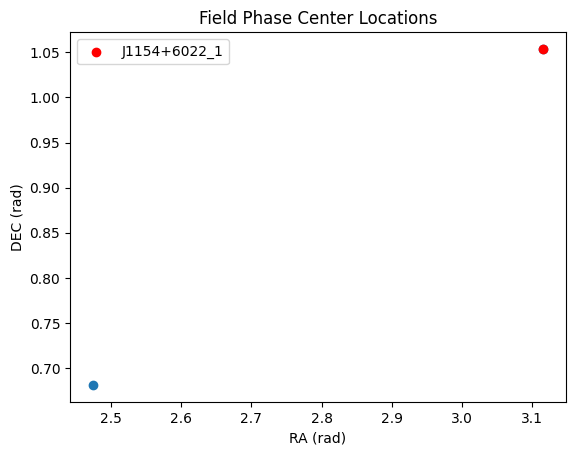

In [14]:
ps_xdt.xr_ps.plot_phase_centers()

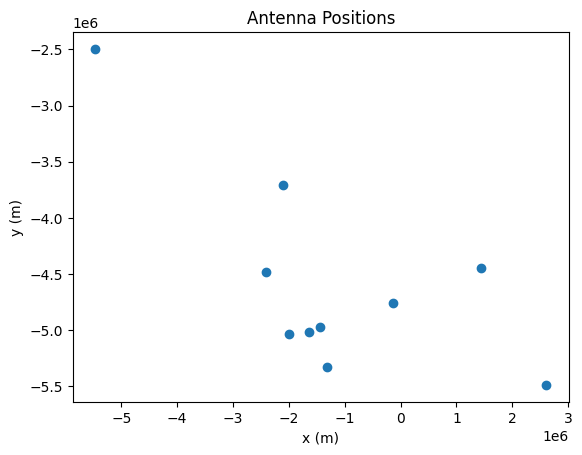

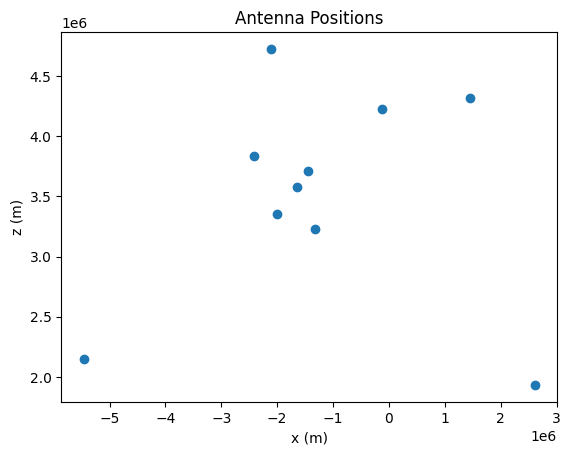

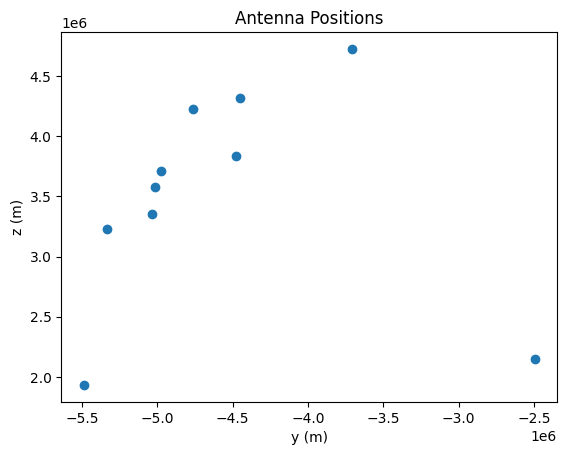

In [15]:
ps_xdt.xr_ps.plot_antenna_positions()